# GDA for CIFAR-10

In [2]:
import random
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
# This is a bit of magic to make matplotlib figures appear inline in the notebook
# rather than in a new window.

%matplotlib inline
plt.rcParams['figure.figsize'] = (10.0, 8.0) # set default size of plots
plt.rcParams['image.interpolation'] = 'nearest'


# Some more magic so that the notebook will reload external python modules;
# see http://stackoverflow.com/questions/1907993/autoreload-of-modules-in-ipython

%load_ext autoreload
%autoreload 2

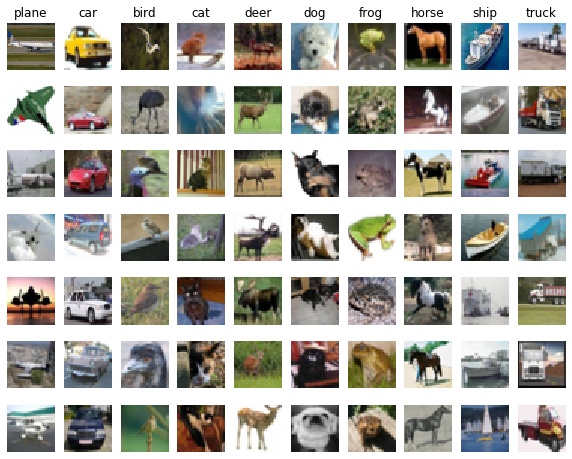

Training data shape: 49000,3072
Validation data shape: 1000,3072
Test data shape: 10000,3072
Training data shape with bias term: 49000,3073
Validation data shape with bias term: 1000,3073
Test data shape with bias term: 10000,3073


In [4]:
import utils

# Get the CIFAR-10 data broken up into train, validation and test sets

X_train, y_train, X_val, y_val, X_test, y_test = utils.get_CIFAR10_data()

In [5]:
X_train.shape

(49000, 3073)

In [6]:
y_train.shape

(49000,)

# Build GDA model with X_train and y_train

In [3]:
qda = QuadraticDiscriminantAnalysis(store_covariance=True)
qda.fit(X_train, y_train)

C:\Users\Darren\Anaconda3\envs\MacbookPro\lib\site-packages\sklearn\discriminant_analysis.py:691: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")


QuadraticDiscriminantAnalysis(priors=None, reg_param=0.0, store_covariance=True,
                              tol=0.0001)

In [7]:
lda = LinearDiscriminantAnalysis(store_covariance=True)
lda.fit(X_train, y_train)

LinearDiscriminantAnalysis(n_components=None, priors=None, shrinkage=None,
                           solver='svd', store_covariance=True, tol=0.0001)

# Test model on X_test and y_test
- print accuracy of model
- print confusion_matrix

In [5]:
qda_predict = qda.predict(X_test)
test_accuracy_qda = np.mean(qda_predict == y_test)
print(f'For Quadratic Discriminant Analysis, test accuracy is {test_accuracy_qda}')
print (f'For Quadratic Discriminant Analysis, confusion matrix is \n{confusion_matrix(y_test,qda_predict)}')

For Quadratic Discriminant Analysis, test accuracy is 0.3588
For Quadratic Discriminant Analysis, confusion matrix is 
[[149 285  29  17  16   5 145  66 109 179]
 [  4 706   0   0   0   0  80  19  16 175]
 [ 12 113 144  25  47  38 410 105  13  93]
 [  8 185  15 124  10  74 281 149  11 143]
 [  3 105   7   8 175  11 385 200  12  94]
 [  3 152  13  49   9 168 286 200   8 112]
 [  7  87  10   5  16   8 788  21   5  53]
 [  0 131   5   4   6  14 139 534   5 162]
 [ 30 285   8   6   9   7  83  51 203 318]
 [  4 278   2   4   3   0  53  46  13 597]]


In [6]:
lda_predict = lda.predict(X_test)
test_accuracy_lda = np.mean(lda_predict == y_test)
print(f'For Linear Discriminant Analysis, test accuracy is {test_accuracy_lda}')
print (f'For Linear Discriminant Analysis, confusion matrix is \n{confusion_matrix(y_test,lda_predict)}')

For Linear Discriminant Analysis, test accuracy is 0.3708
For Linear Discriminant Analysis, confusion matrix is 
[[462  44  48  47  22  45  19  49 191  73]
 [ 64 423  47  48  33  46  35  48  83 173]
 [ 96  36 253 110 133  95 127  71  50  29]
 [ 44  49 116 246  64 219 126  51  31  54]
 [ 58  26 157  81 273 101 146 101  26  31]
 [ 36  37 113 186  86 323  82  68  38  31]
 [ 14  37 104 143 113  86 415  45  16  27]
 [ 48  41  82  71  86 104  49 402  44  73]
 [171  84  25  38  13  51  11  22 487  98]
 [ 71 183  28  39  30  33  43  60  89 424]]


# Visualize the means for all 10 classes

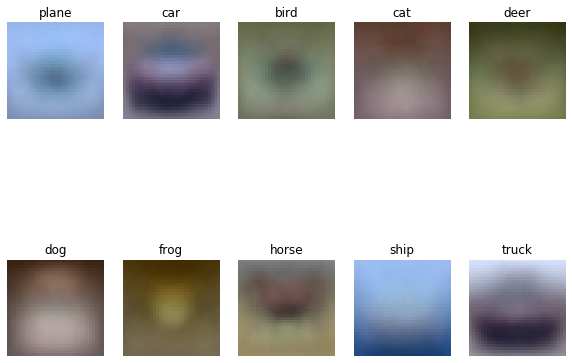

In [7]:
theta = qda.means_[:,1:] # strip out the bias term
theta = theta.reshape(10, 32, 32, 3)

theta_min, theta_max = np.min(theta), np.max(theta)

classes = ['plane', 'car', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']
for i in range(10):
  plt.subplot(2, 5, i + 1)
  
  # Rescale the weights to be between 0 and 255
  thetaimg = 255.0 * (theta[i].squeeze() - theta_min) / (theta_max - theta_min)
  plt.imshow(thetaimg.astype('uint8'))
  plt.axis('off')
  plt.title(classes[i])
plt.savefig('QDAmeans.png')
plt.show()

In [10]:
lda.means_[:, 1:].shape

(10, 3072)

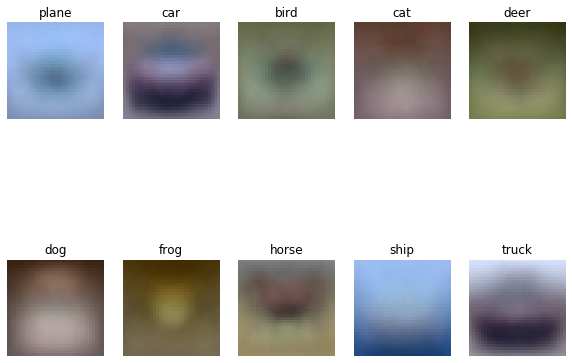

In [8]:
theta = lda.means_[:,1:] # strip out the bias term
theta = theta.reshape(10, 32, 32, 3)

theta_min, theta_max = np.min(theta), np.max(theta)

classes = ['plane', 'car', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']
for i in range(10):
  plt.subplot(2, 5, i + 1)
  
  # Rescale the weights to be between 0 and 255
  thetaimg = 255.0 * (theta[i].squeeze() - theta_min) / (theta_max - theta_min)
  plt.imshow(thetaimg.astype('uint8'))
  plt.axis('off')
  plt.title(classes[i])
plt.savefig('LDAmeans.png')
plt.show()

# Visualize the covariance matrix

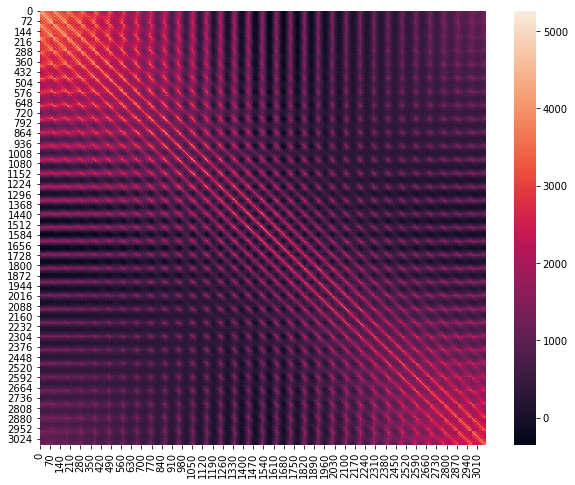

In [14]:
sns.heatmap(lda.covariance_)